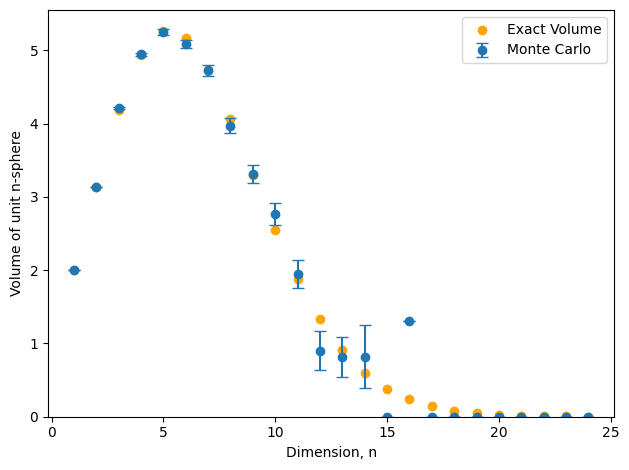

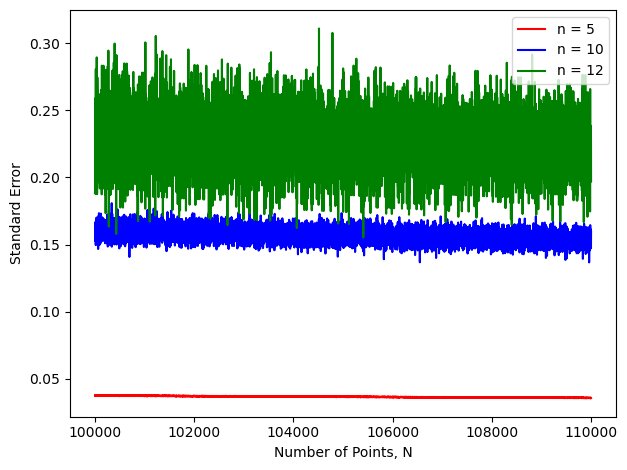

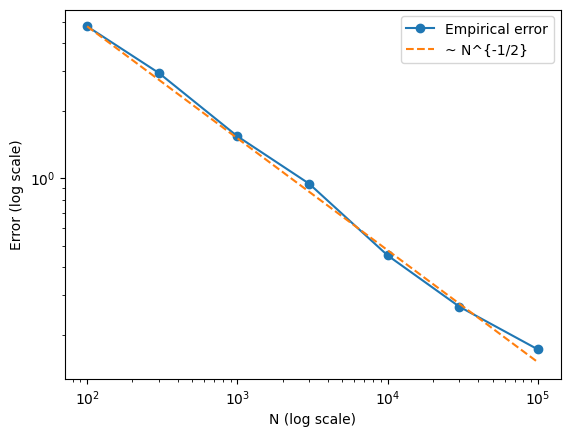

In [8]:
import numpy as np
from math import pi
from scipy.special import gamma 
import matplotlib.pyplot as plt

def nsphere(n, N, seed):
    """This function takes two arguments: the dimension of sphere n (int), N (int) the number of sample points in the [-1.1]^n cube, and an RNG seed (int) for reproducability.
    
       It then returns a single float value. Which is the estimated volume of the sphere. 
    """
    rng = np.random.default_rng(seed)
    x = np.random.uniform(-1,1, (N,n))
    n_sphere = (np.sum(x**2, axis = 1) <= 1)
    n_cube = 2**n
    sphere_mean = n_sphere.mean()
    est_volume = n_cube*sphere_mean
    
    return est_volume 


def exactvol(n):
    """ This is the simple analytic function describing the volume of an n-dim sphere. Its closed form requires the Gamma function."""
    
    return pi**(n/2) / gamma(n/2 + 1)
   


def SD(n,N, seed):
    """ This computes the standard deviation in the estimated volume 
    
        using the typical variance formula for a Bernoulli random variable."""
    rng = np.random.default_rng(seed)
    x = np.random.uniform(-1,1, (N,n))
    n_sphere = (np.sum(x**2, axis = 1) <= 1)
    sphere_mean = n_sphere.mean()
    return  2**n * np.sqrt(sphere_mean*(1- sphere_mean)/N)


#Lets make a graph
dims = list(range(1,25)) #testing accuracy up to dim = 25
errs = [SD(l, 100000, 42) for l in dims] #error bars
N_x = [N for N in range(100000, 110000)]


y_vals_monte = [nsphere(j,100000, seed = 42) for j in dims] #estimated
y_vals_exact = [exactvol(k) for k in dims] #exact
y_vals_error = [SD(m,100000, seed = 42) for m in dims]

y_error_decay_5 = [SD(5, N, 42) for N in N_x]
y_error_decay_10 = [SD(10, N, 42) for N in N_x]
y_error_decay_12 = [SD(12, N, 42) for N in N_x]



#plotting
plt.figure(1)
plt.errorbar(dims, y_vals_monte, yerr = errs, fmt='o', capsize=4, label="Monte Carlo")
plt.scatter(dims, y_vals_exact, label="Exact Volume", color="orange")
plt.xlabel("Dimension, n")
plt.ylabel("Volume of unit n-sphere")
plt.legend()
plt.tight_layout()
plt.ylim(bottom = 0)

#standard error vs sample count
plt.figure(2)
plt.plot(N_x, y_error_decay_5, label = "n = 5", color = "red")
plt.plot(N_x, y_error_decay_10, label = "n = 10", color = "blue")
plt.plot(N_x, y_error_decay_12, label = "n = 12", color = "green")
plt.xlabel("Number of Points, N")
plt.ylabel("Standard Error")
plt.legend()
plt.tight_layout()



plt.figure(3)
Ns = [100, 300, 1000, 3000, 10000, 30000, 100000]
n = 10   # pick a dimension
trials = 50
emp_err = []

#error decay
for N in Ns:
    estimates = [nsphere(n, N, np.random.default_rng()) for _ in range(trials)]
    emp_err.append(np.std(estimates, ddof=1))

plt.loglog(Ns, emp_err, 'o-', label="Empirical error")
plt.loglog(Ns, emp_err[0]*(np.array(Ns[0])/np.array(Ns))**0.5, '--', label="~ N^{-1/2}")
plt.xlabel("N (log scale)")
plt.ylabel("Error (log scale)")
plt.legend()





plt.show()

        




# 